In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data extraction

In [148]:
data=pd.read_csv("hour.csv")

In [149]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis

In [150]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

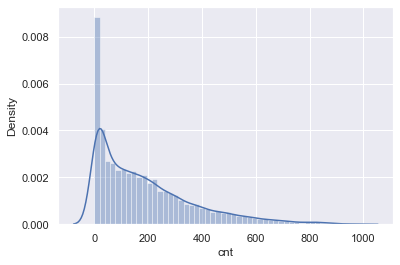

In [152]:
cnt_graph = sns.distplot(data["cnt"])
cnt_graph

In [153]:
print("Skewness : %f" % data["cnt"].skew())
print("Kurtosis : %f" % data["cnt"].kurt())

Skewness : 1.277412
Kurtosis : 1.417203


Data is positively skewed

In [154]:
data.isnull().sum() # Finding missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing value is present here

In [155]:
data.dteday = pd.to_datetime(data.dteday)

In [156]:
data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [157]:
data['season']=data.season.astype('category')

In [158]:
data['weekday']=data.weekday.astype('category')

In [159]:
data['workingday']=data.workingday.astype('category')

In [160]:
data['weathersit']=data.weathersit.astype('category')

In [161]:
data['yr']=data.yr.astype('category')

In [162]:
data['mnth']=data.mnth.astype('category')

In [163]:
data['hr']=data.hr.astype('category')

In [164]:
data['holiday']=data.holiday.astype('category')

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

<AxesSubplot:xlabel='season', ylabel='cnt'>

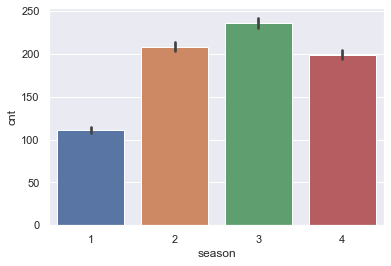

In [166]:
sns.barplot(x="season", y = "cnt", data = data)

Bike sharing in fall season is higher than other season

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

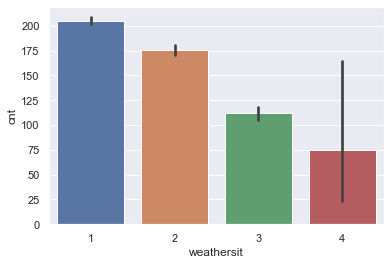

In [167]:
sns.barplot(x="weathersit", y = "cnt", data = data)

Bike sharing in clear weather is higher than other

In [168]:
data.pivot_table(values='cnt',columns=['weathersit'],aggfunc='count')

weathersit,1,2,3,4
cnt,11413,4544,1419,3


In [169]:
data.pivot_table(values='cnt',columns='yr',aggfunc='count')

yr,0,1
cnt,8645,8734


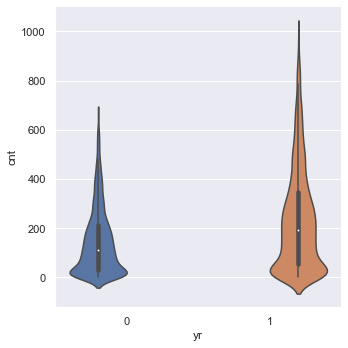

In [170]:
sns.catplot(data=data,x='yr',y='cnt',kind='violin',hue='yr')

Bike sharing is higher in year 2012 than 2011

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

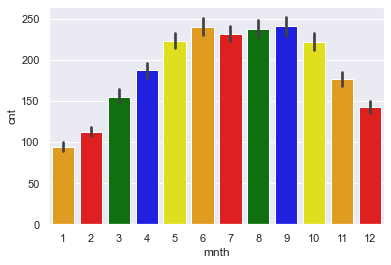

In [171]:
sns.barplot(x="mnth", y = "cnt", data = data, palette = ["orange", "red", "green", "blue", "yellow"])

Sharing of bike is maximum in month June and September followed by August and July and minimum is in month of January

<AxesSubplot:>

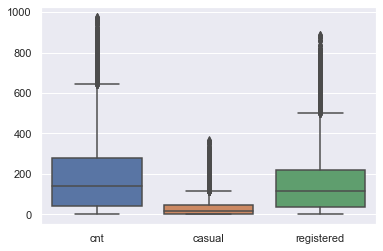

In [172]:
sns.boxplot(data=data[['cnt', 'casual', 'registered']])

Number of registered bike rental is  more than casual

<AxesSubplot:>

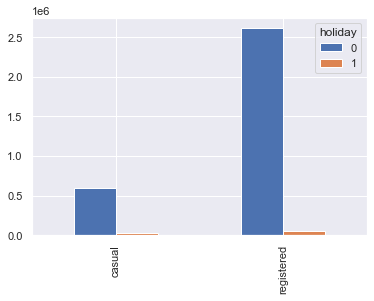

In [173]:
data.pivot_table(values=['casual','registered'],columns='holiday',aggfunc='sum').plot.bar()

Bike sharing on holiday is very less compared to weekday for both casual and registered 

In [174]:
data.groupby("holiday").sum()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,,,,,,,,
0,146463923,8403.94,8046.0703,10592.93,3207.2403,597658,2616586,3214244
1,4559587,233.20,222.4252,307.68,96.4660,22359,56076,78435


In [175]:
reg_holi = data.groupby("holiday")["registered"].sum()
reg_holi

holiday
0    2616586
1      56076
Name: registered, dtype: int64

Total number of registered shared bike in holiday and weekday

<AxesSubplot:xlabel='hr', ylabel='registered'>

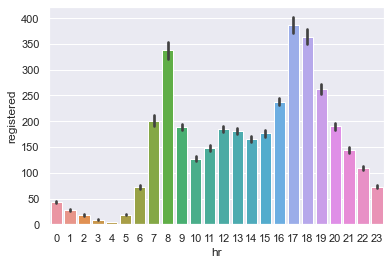

In [176]:
sns.barplot(x="hr", y = "registered", data = data)

In hour 17 and 18 maximum number of bikes are shared

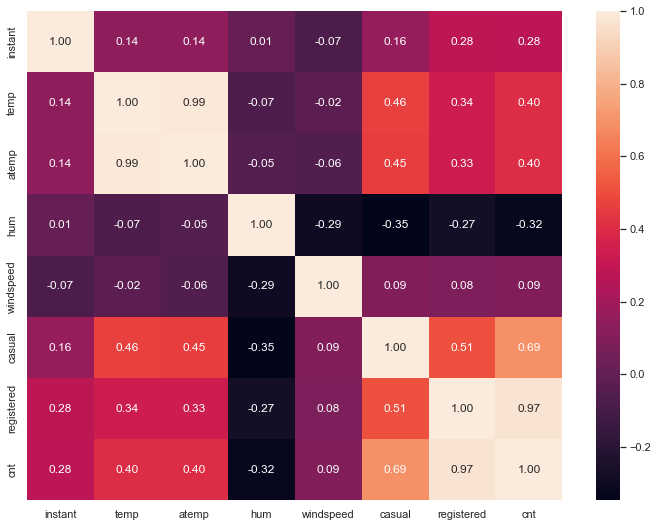

In [177]:
import seaborn as sns
f = plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [178]:
list_columns=['temp','windspeed','cnt']
hrs=data[list_columns]

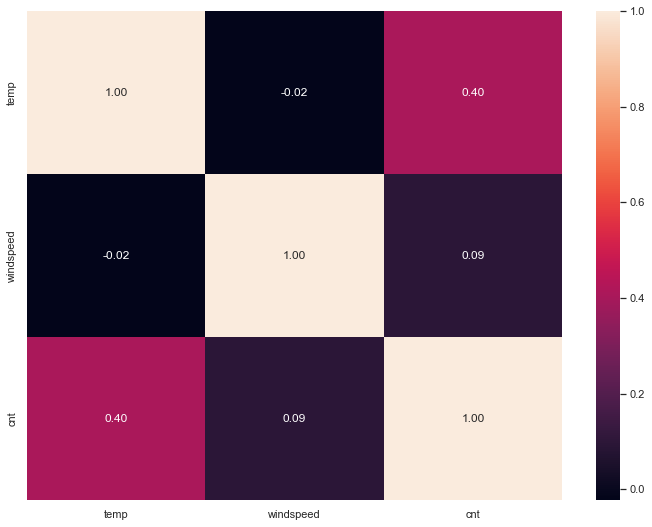

In [179]:
import seaborn as sns
f = plt.figure(figsize=(12, 9))
sns.heatmap(hrs.corr(), annot=True, fmt=".2f")
plt.show()

In [180]:
list_columns=['hum','cnt']
hrs=data[list_columns]

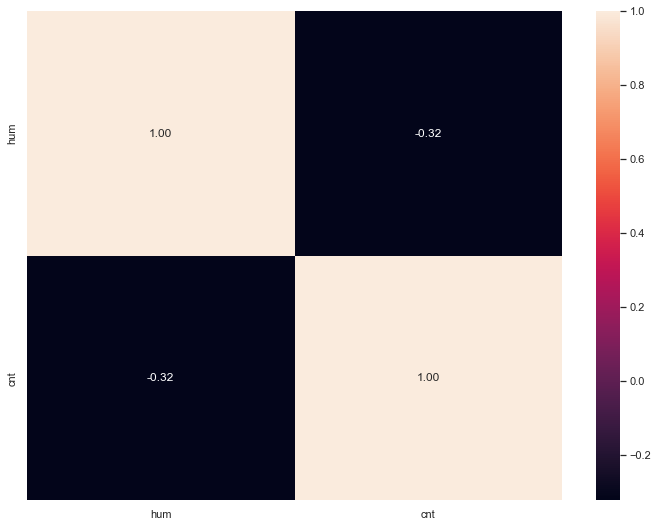

In [181]:
import seaborn as sns
f=plt.figure(figsize=(12,9))
sns.heatmap(hrs.corr(),annot=True,fmt='.2f')
plt.show()

In [182]:
grouped=data.groupby(['yr','season'])

In [183]:
grouped[['cnt','season']].agg([np.sum,np.mean,np.std])

cnt                        
              sum        mean         std
yr season                                
0  1       150000   72.533849   67.447952
   2       347316  157.655924  138.421632
   3       419650  187.343750  149.352219
   4       326137  152.828960  133.225077
1  1       321348  147.814167  143.702976
   2       571273  258.963282  216.017955
   3       641479  284.343528  226.013549
   4       515476  245.698761  212.462838

In [184]:
data[["casual", "registered", "cnt"]].corr()

,casual,registered,cnt
casual,1.000000,0.506618,0.694564
registered,0.506618,1.000000,0.972151
cnt,0.694564,0.972151,1.000000


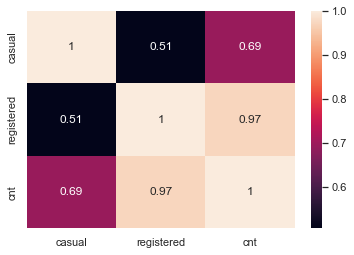

In [185]:
sns.set(rc={"figure.figsize":(6, 4)})
c = sns.heatmap(data = hour[["casual", "registered", "cnt"]].corr(), annot = True)
plt.show()

In [186]:
from scipy.stats import ttest_1samp
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind

In [187]:
stats.pearsonr(data["temp"] , data["windspeed"])
print("correlation and p value is : ", stats.pearsonr(data["temp"] , data["windspeed"]))

correlation and p value is :  (-0.02312526248533158, 0.002297736859568214)


Correlation with temp and windspeed is significant

In [188]:
stats.pearsonr(data["season"] , data["cnt"])
print("correlation and p value is : ", stats.pearsonr(data["season"] , data["cnt"]))

correlation and p value is :  (0.17805573098267552, 9.182191254212669e-124)


Correlation with season and cnt is significant

In [189]:
stats.pearsonr(data["temp"] , data["atemp"])
print("correlation and p value is : ", stats.pearsonr(data["temp"] , data["atemp"]))

correlation and p value is :  (0.9876721390396481, 0.0)


There is a significant relationship between temp and atemp

In [190]:
stats.pearsonr(data['casual'] , data['registered'])
print("correlation and p value is : ", stats.pearsonr(data['casual'] , data['registered']))

correlation and p value is :  (0.5066177004294635, 0.0)


There is a significant relationship between casual and registered

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Feature Standardization

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [194]:
data[['instant','temp','atemp','hum','windspeed','casual','registered']]=StandardScaler().fit_transform(data[['instant','temp','atemp','hum','windspeed','casual','registered']])

## Splitting into train and test dataset

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [196]:
data=data.drop(['instant','dteday'],axis=1)

In [197]:
y=data.pop('cnt')

In [198]:
x=data

In [199]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  float64 
 13  registered  17379 non-null  float64 
dtypes: category(8), float64(6)
memory usage: 952.8 KB


In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234456)

In [204]:
x_train.shape,x_test.shape

((13903, 14), (3476, 14))

## Modelling Part

In [227]:
model=LinearRegression() # Using Linear Regression

In [206]:
model.fit(x_train,y_train)

LinearRegression()

In [207]:
model.score(x_train,y_train)

1.0

In [208]:
model.score(x_test,y_test)

1.0

In [211]:
from sklearn.metrics import r2_score

In [212]:
y_pred=model.predict(x_test)
y_pred

array([ 20.,  50., 191., ..., 370., 226., 193.])

In [213]:
r2_score(y_pred,y_test)

1.0

In [214]:
from sklearn.metrics import mean_squared_error

In [215]:
mean_squared_error(y_pred,y_test)

4.91434671931517e-26

In [216]:
np.sqrt(mean_squared_error(y_pred,y_test))

2.2168325871195527e-13

In [209]:
from sklearn import linear_model

In [210]:
Lasso_model=linear_model.Lasso(alpha=0.5) # Using Lasso model

In [217]:
Lasso_model.fit(x_train,y_train)

Lasso(alpha=0.5)

In [218]:
Lasso_model.score(x_train,y_train)

0.9999893270832767

In [219]:
Lasso_model.score(x_test,y_test)

0.9999892306943956

In [220]:
Lasso_model1=linear_model.Lasso(alpha=0.1)

In [221]:
Lasso_model1.fit(x_train,y_train)

Lasso(alpha=0.1)

In [223]:
Lasso_model.score(x_train,y_train)

0.9999893270832767

In [222]:
Lasso_model1.score(x_test,y_test)

0.999999574703022

In [224]:
from sklearn.linear_model import Ridge   # Using Ridge model

In [225]:
model1 = Ridge(alpha=5)
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.999999867845465

In [226]:
model1.score(x_test,y_test)

0.9999998700304114